#Regularization


Applying Regularization for Linear and Logistic Regression will change the cost functiona nd gradient descent

- Cost
    - The cost functions differ significantly between linear and logistic regression, but adding regularization to the equations is the same.
- Gradient
    - The gradient functions for linear and logistic regression are very similar. They differ only in the implementation of $f_{wb}$.

## Cost functions with regularization

### Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$


Compare this to the cost function without regularization
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>
    

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.


In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving deeplearning.mplstyle to deeplearning.mplstyle
User uploaded file "deeplearning.mplstyle" with length 4889 bytes


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)

In [14]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [15]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>


Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized.

In [16]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [17]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

### Gradient function for regularized linear regression

In [18]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [19]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


### Gradient function for regularized logistic regression

In [20]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [21]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


Let's compare the normal, overfit and regularized graphs


##Linear Regression

###Overfit


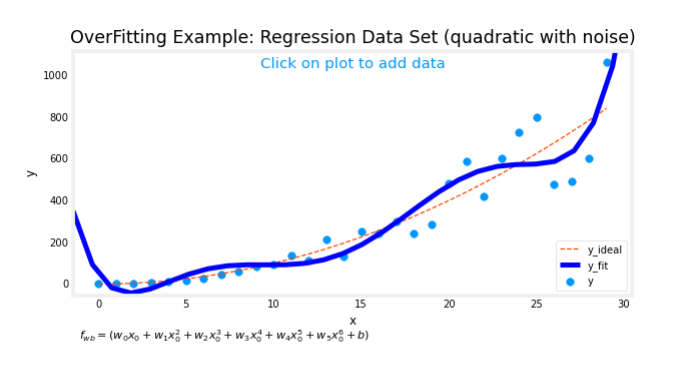

###Normal without Regularization

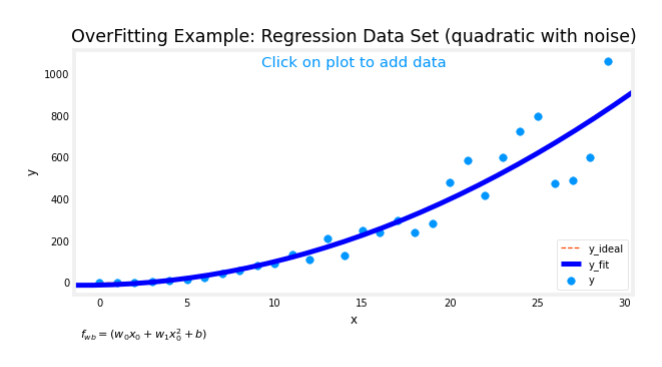

###Overfit with Regularization

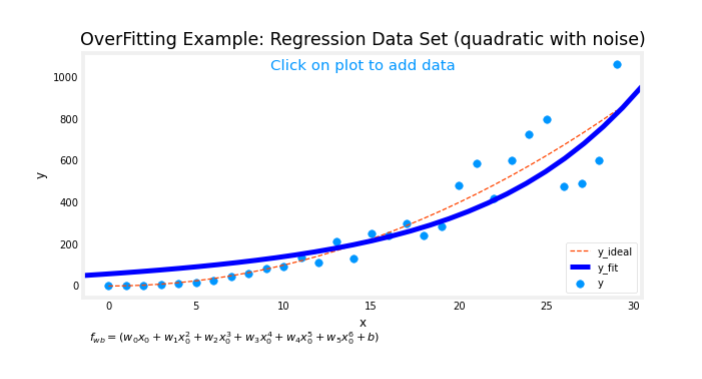

##Logistic Regression

###Overfit

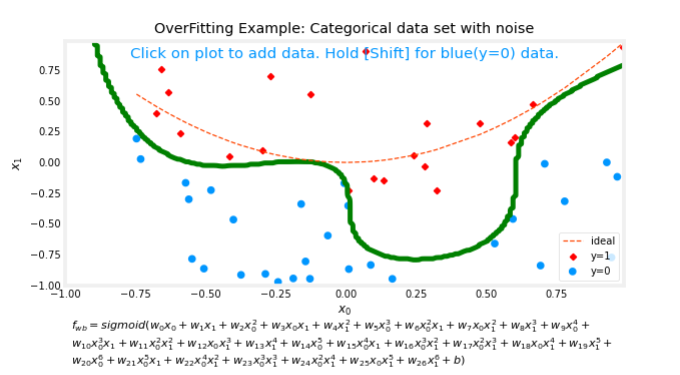

##Normal

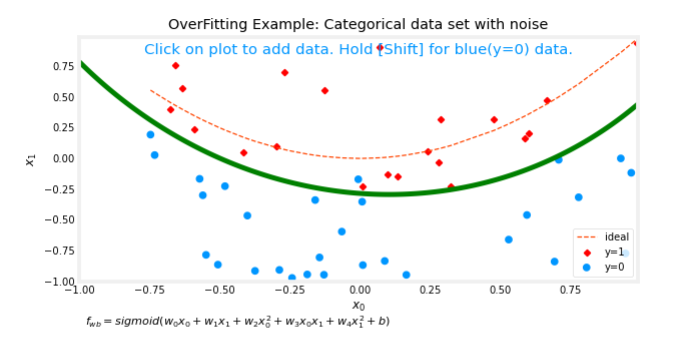

##Overfit with Regularization


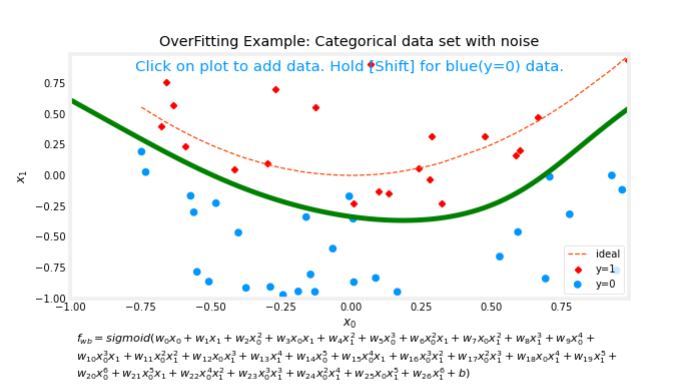

*   **Overfit:** This graph shows a model that has fit the training data very closely, including the noise. This is evident by the wavy line that tries to pass through every point. This model will likely perform poorly on new, unseen data.


*   **Normal without Regularization:** This graph shows a model that is a good fit for the data. The line captures the general trend without being overly influenced by individual data points. This model is likely to generalize well to new data.


*   **Overfit with Regularization:** This graph shows a model that started to overfit but regularization has helped to smooth out the curve. While it might not fit the training data as perfectly as the purely overfit model, it is less likely to be affected by noise and should perform better on new data compared to the overfit model. Regularization penalizes large weights, effectively making the model simpler and less prone to overfitting.